In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
uploaded = files.upload()

In [8]:
df = pd.read_csv("adult.csv")
df.head()

Saving adult.csv to adult (2).csv


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

print(df.isnull().sum())

df = df.dropna()

df_encoded = pd.get_dummies(df.drop('income', axis=1))

le = LabelEncoder()
y = le.fit_transform(df['income'])

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)


<ipython-input-9-dc3414794696>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [10]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


Avaliação do modelo: Árvore de Decisão
Acurácia:  0.81
Precisão:  0.60
Recall:    0.62
F1-score:  0.61


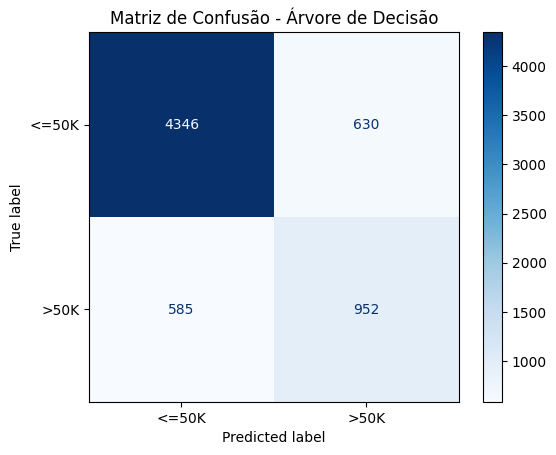


Avaliação do modelo: Random Forest
Acurácia:  0.85
Precisão:  0.71
Recall:    0.61
F1-score:  0.65


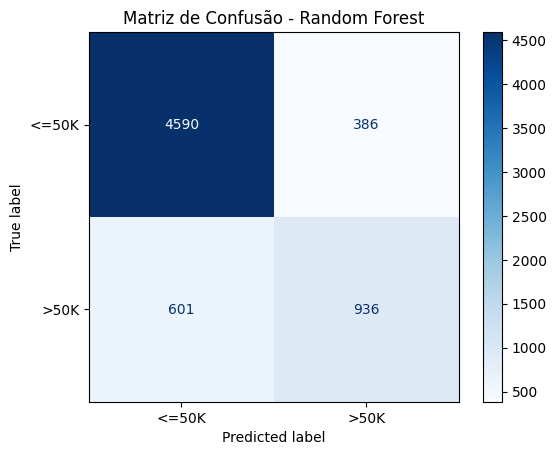

In [12]:
def avaliar_modelo(nome, y_true, y_pred):
    print(f'\nAvaliação do modelo: {nome}')
    print(f"Acurácia:  {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precisão:  {precision_score(y_true, y_pred):.2f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.2f}")
    print(f"F1-score:  {f1_score(y_true, y_pred):.2f}")
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.show()

avaliar_modelo('Árvore de Decisão', y_test, y_pred_dt)
avaliar_modelo('Random Forest', y_test, y_pred_rf)

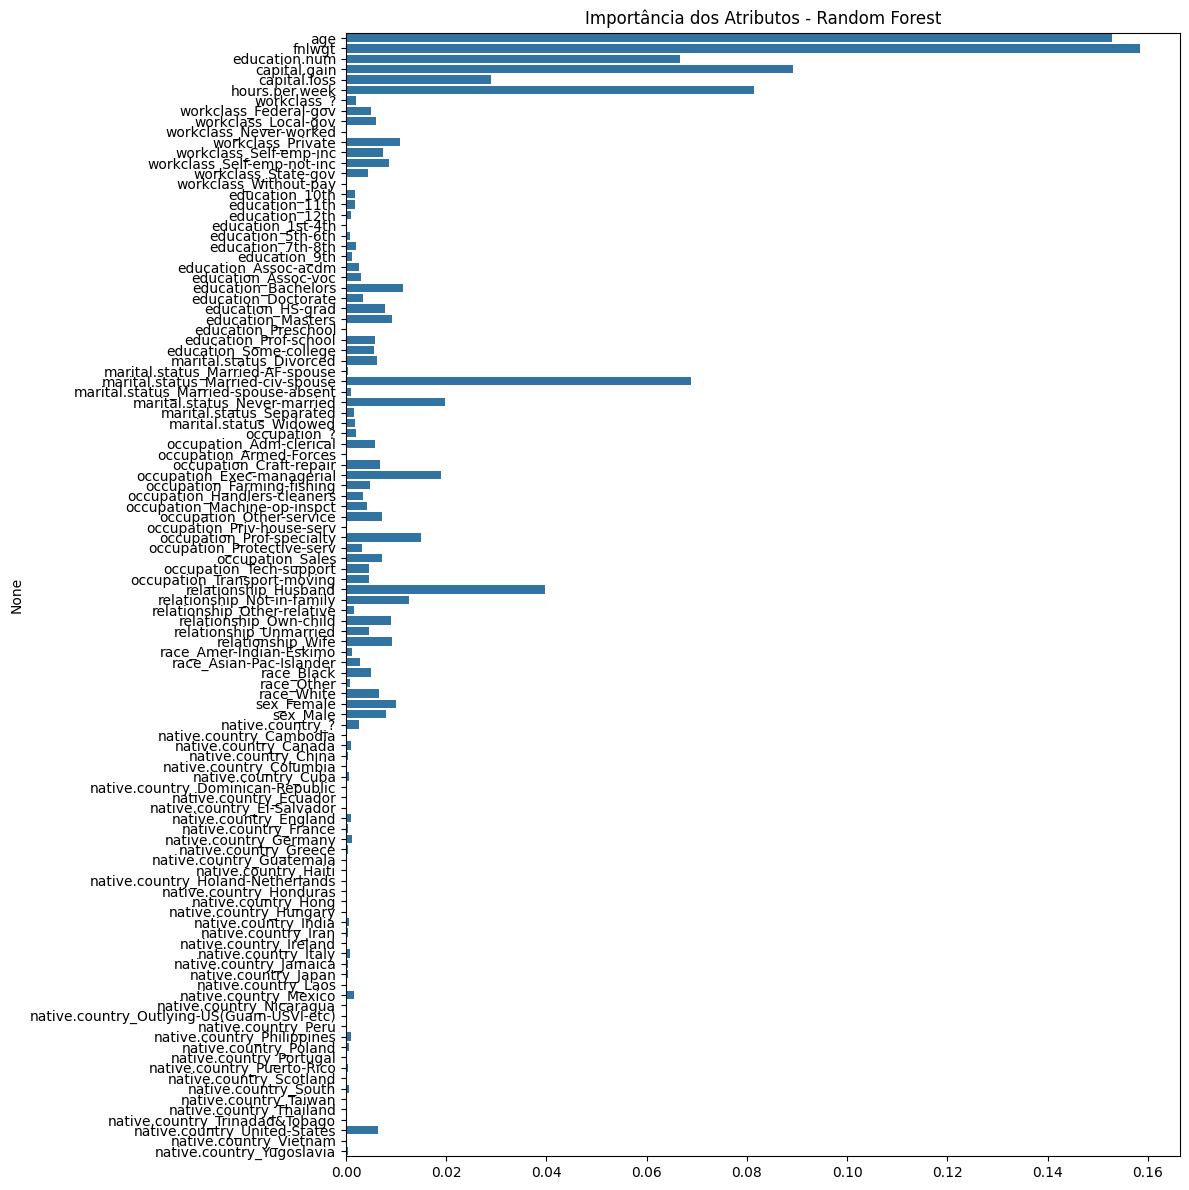

In [14]:
importances = rf_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(12, 12))
sns.barplot(x=importances, y=features)
plt.title('Importância dos Atributos - Random Forest')
plt.tight_layout()
plt.show()